In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Load the dataset


In [2]:
df = pd.read_csv('mini.csv')

In [3]:
# View the first few rows of the dataset
df.head()



,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
2,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
3,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
4,Shuttlecock Boys,Normal,No,No,comedy,Yes,Yes,Yes,Aakar Kaushik,Hemant Gaba,Avinash Baghel,10,5000000,170000


In [4]:
# Check for missing values
print(df.isnull().sum())

Movie Name            0
Release Period        0
Whether Remake        0
Whether Franchise     0
Genre                 0
New Actor             0
New Director          0
New Music Director    0
Lead Star             0
Director              0
Music Director        0
Number of Screens     0
Revenue(INR)          0
Budget(INR)           0
dtype: int64


In [5]:
# Get the data types of each column
df.dtypes

Movie Name            object
Release Period        object
Whether Remake        object
Whether Franchise     object
Genre                 object
New Actor             object
New Director          object
New Music Director    object
Lead Star             object
Director              object
Music Director        object
Number of Screens      int64
Revenue(INR)           int64
Budget(INR)            int64
dtype: object

In [6]:
df.describe()


,Number of Screens,Revenue(INR),Budget(INR)
count,521.000000,5.210000e+02,5.210000e+02
mean,617.009597,1.733272e+08,2.813942e+08
std,800.465986,2.379340e+08,6.324908e+08
min,1.000000,1.000000e+06,1.600000e+04
25%,45.000000,1.750000e+07,1.250000e+06
50%,285.000000,7.500000e+07,3.250000e+07
75%,900.000000,2.300000e+08,3.311750e+08
max,4250.000000,1.750000e+09,7.024750e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie Name          521 non-null    object
 1   Release Period      521 non-null    object
 2   Whether Remake      521 non-null    object
 3   Whether Franchise   521 non-null    object
 4   Genre               521 non-null    object
 5   New Actor           521 non-null    object
 6   New Director        521 non-null    object
 7   New Music Director  521 non-null    object
 8   Lead Star           521 non-null    object
 9   Director            521 non-null    object
 10  Music Director      521 non-null    object
 11  Number of Screens   521 non-null    int64 
 12  Revenue(INR)        521 non-null    int64 
 13  Budget(INR)         521 non-null    int64 
dtypes: int64(3), object(11)
memory usage: 57.1+ KB


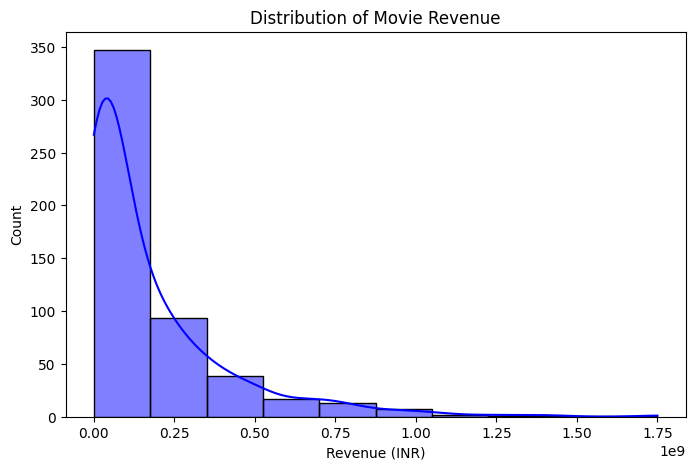

In [8]:
# Visualizing the distribution of movie revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue(INR)'], bins=10, kde=True, color='blue')
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue (INR)')
plt.ylabel('Count')
plt.show()

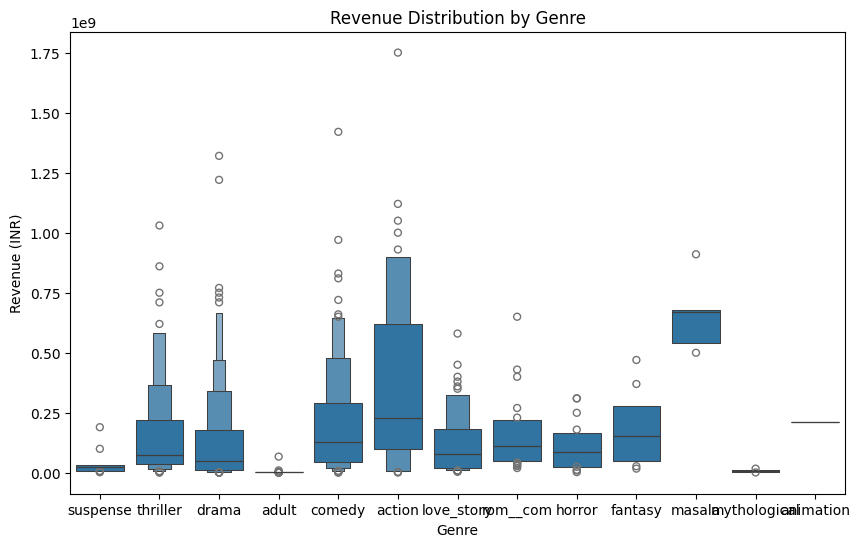

In [9]:
# Genre-wise revenue comparison
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Genre', y='Revenue(INR)', data=df)
plt.title('Revenue Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue (INR)')
plt.show()


C:\Users\Samath\AppData\Local\Temp\ipykernel_27060\3975445879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Release Period', y='Revenue(INR)', data=df, palette='coolwarm')


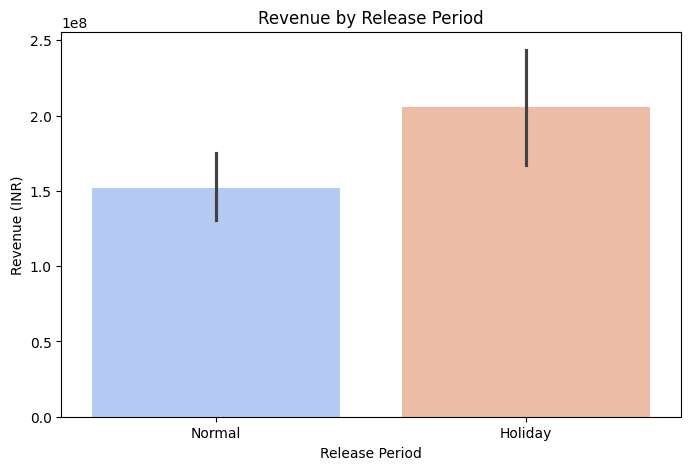

In [10]:
# Release Period vs. Revenue
plt.figure(figsize=(8, 5))
sns.barplot(x='Release Period', y='Revenue(INR)', data=df, palette='coolwarm')
plt.title('Revenue by Release Period')
plt.xlabel('Release Period')
plt.ylabel('Revenue (INR)')
plt.show()

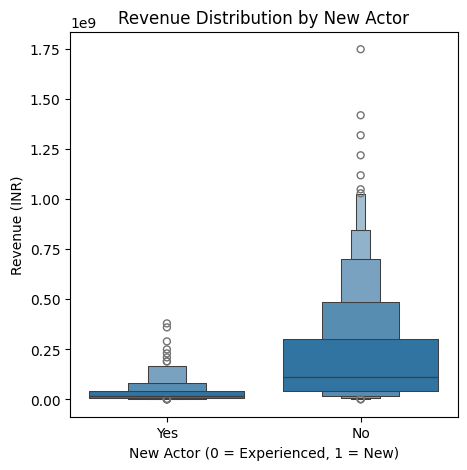

In [11]:
# 7. Visualize the relation between 'New Actor' and Revenue
plt.figure(figsize=(5, 5))
sns.boxenplot(x='New Actor', y='Revenue(INR)', data=df)
plt.title('Revenue Distribution by New Actor')
plt.xlabel('New Actor (0 = Experienced, 1 = New)')
plt.ylabel('Revenue (INR)')
plt.show()

In [12]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in ['Movie Name', 'Release Period','Whether Remake','Whether Franchise','Genre', 'Lead Star', 'Director', 'Music Director', 'New Actor', 'New Director', 'New Music Director']:
    df[col] = le.fit_transform(df[col])

In [13]:
corr_matrix=df.corr()
corr_matrix

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
Movie Name,1.000000,-0.013614,0.059875,0.039647,0.045130,0.073060,0.014255,0.017188,0.072737,0.006800,0.061105,0.002253,-0.018385,-0.031068
Release Period,-0.013614,1.000000,-0.028692,-0.037936,0.041313,0.140614,0.055445,0.095067,0.089886,-0.015916,0.053755,-0.065215,-0.109749,-0.074858
Whether Remake,0.059875,-0.028692,1.000000,-0.062972,-0.022753,-0.139427,-0.139224,-0.106357,-0.123146,-0.021038,0.008874,0.267339,0.234479,0.153650
Whether Franchise,0.039647,-0.037936,-0.062972,1.000000,-0.082154,-0.104384,-0.140555,0.002781,-0.029663,0.118210,0.021503,0.361253,0.323645,0.289575
Genre,0.045130,0.041313,-0.022753,-0.082154,1.000000,-0.021899,0.075992,-0.007833,0.102062,0.005941,0.109714,-0.047277,-0.091962,-0.086891
New Actor,0.073060,0.140614,-0.139427,-0.104384,-0.021899,1.000000,0.279374,0.242049,0.021335,-0.029351,0.045488,-0.315457,-0.314352,-0.214885
New Director,0.014255,0.055445,-0.139224,-0.140555,0.075992,0.279374,1.000000,0.213015,0.078785,-0.081503,0.055044,-0.319559,-0.317002,-0.246840
New Music Director,0.017188,0.095067,-0.106357,0.002781,-0.007833,0.242049,0.213015,1.000000,0.101370,-0.019868,0.015873,-0.182618,-0.205351,-0.140222
Lead Star,0.072737,0.089886,-0.123146,-0.029663,0.102062,0.021335,0.078785,0.101370,1.000000,0.013702,0.019898,-0.242522,-0.299496,-0.276422
Director,0.006800,-0.015916,-0.021038,0.118210,0.005941,-0.029351,-0.081503,-0.019868,0.013702,1.000000,0.104853,0.016907,0.022774,0.049614


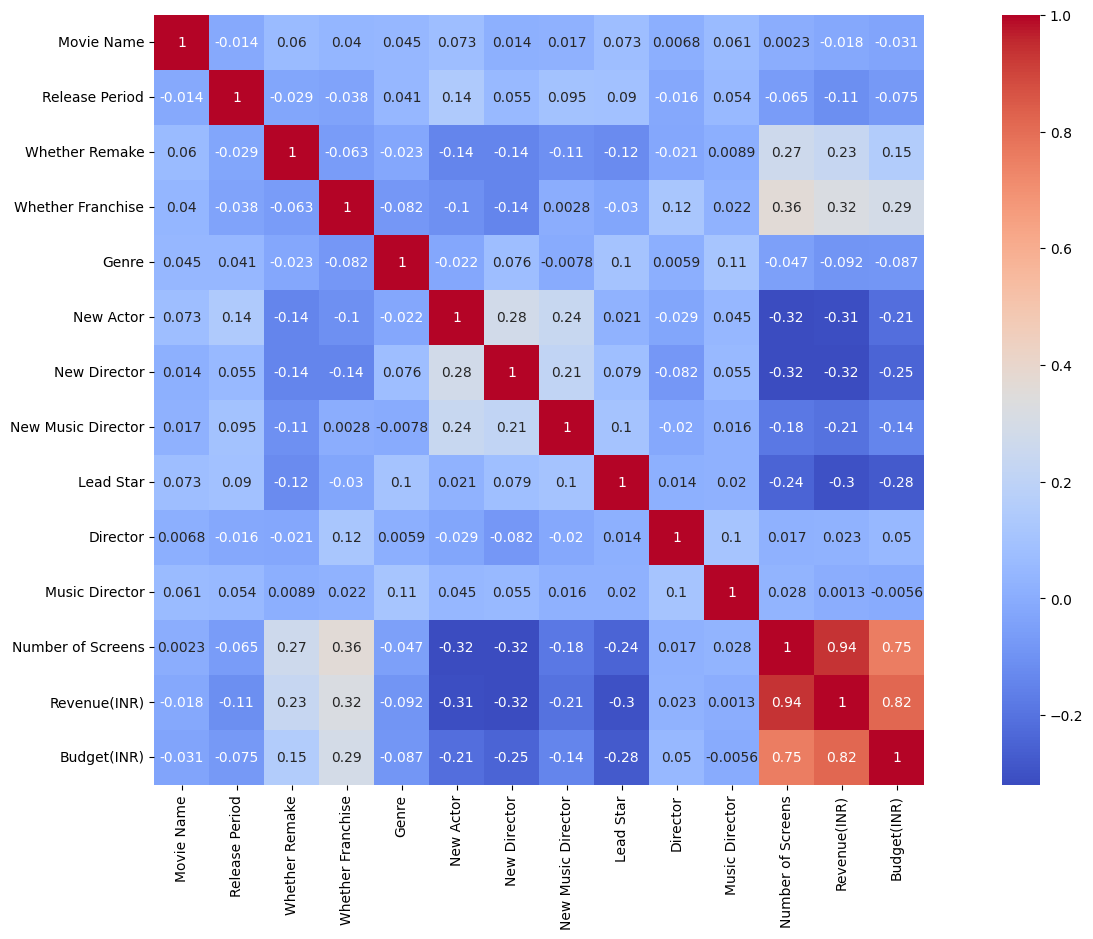

In [14]:
# Visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the data
data_scaled = scaler.fit_transform(df)
print(data_scaled)

[[-0.46542718  0.81193329 -0.28049055 ... -0.76530146 -0.70813303
  -0.44519158]
 [ 0.62500221 -1.23162828 -0.28049055 ... -0.11505551 -0.41365107
  -0.35559437]
 [ 0.84441788 -1.23162828 -0.28049055 ...  0.22882455  0.15427843
  -0.43820454]
 ...
 [ 0.3789907   0.81193329 -0.28049055 ... -0.77030335 -0.71233991
  -0.44527071]
 [-0.33244798  0.81193329 -0.28049055 ... -0.17757916 -0.26641009
  -0.40386276]
 [ 0.95080124 -1.23162828 -0.28049055 ... -0.77030335 -0.72285713
  -0.44311051]]


In [16]:
#Train Test
X = df.drop(['Revenue(INR)'], axis=1)
y = df['Revenue(INR)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
dt_model = DecisionTreeRegressor()
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=5)


# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Evaluate the models
print("Evaluation Metrics:")
print("----------------------------")

# Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R²:", r2_lr)

print("----------------------------")
# RandomForest Regression
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression:")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R²:", r2_rf)

print("----------------------------")
# Decision Tree
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree:")
print("MSE:", mse_dt)
print("MAE:", mae_dt)
print("R²:", r2_dt)

print("----------------------------")
# Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting:")
print("MSE:", mse_gb)
print("MAE:", mae_gb)
print("R²:", r2_gb)

print("----------------------------")


Evaluation Metrics:
----------------------------
Linear Regression:
MSE: 9135743619225570.0
MAE: 56193970.035206534
R²: 0.8327037150236294
----------------------------
Random Forest Regression:
MSE: 7529829087395238.0
MAE: 50438328.571428575
R²: 0.8621116697958493
----------------------------
Decision Tree:
MSE: 8920165380952381.0
MAE: 58612380.952380955
R²: 0.8366514438444074
----------------------------
Gradient Boosting:
MSE: 7750699936078937.0
MAE: 54013336.3382969
R²: 0.8580670212172048
----------------------------


In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
print(type(model)) 


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [20]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained your model
# Example: Create and train a RandomForest model (Replace this with your own training code)
model = RandomForestRegressor()
model.fit(X_train, y_train)  # X_train and y_train should be your training data

# Save the trained model to a file using pickle
with open('movie_revenue_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!
